In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [71]:
#get csv files
#out: merged_df.to_csv("../data/4min_pass_wave_salt_temp.csv", index=True)

data_location_01 = "./data/trench_dive_temperature.csv"
data_location_02 = "./data/trench_dive_salinity.csv"
data_location_03 = "./data/trench_dive_current_U.csv"
data_location_04 = "./data/trench_dive_current_V.csv"
data_location_05 = "./data/trench_dive_current_W.csv"
data_location_06 = "./data/buoy/buoy_nrt.csv"
data_location_07 = "./data/seismic_7200.csv"
data_location_08 = "./data/dolphins_01.csv"
data_location_09 = "./data/rain_01.csv"
data_location_10 = "./data/clouds_01.csv"
data_location_11 = "./data/dolphins.csv"

df_temp = pd.read_csv(data_location_01)
df_salinity = pd.read_csv(data_location_02)
df_U = pd.read_csv(data_location_03)
df_V = pd.read_csv(data_location_04)
df_W = pd.read_csv(data_location_05)
df_buoy = pd.read_csv(data_location_06)
df_seismic = pd.read_csv(data_location_07)
df_creatures = pd.read_csv(data_location_08)
df_rain = pd.read_csv(data_location_09)
df_clouds = pd.read_csv(data_location_10)
df_dolphins = pd.read_csv(data_location_11)

In [72]:
# Function for min-max normalization per column
def min_max_normalize_column(df):
    return df.apply(lambda col: (col - col.min()) / (col.max() - col.min()), axis=0)

# Load the CSV files into DataFrames
df_temp = pd.read_csv(data_location_01)
df_salinity = pd.read_csv(data_location_02)
df_U = pd.read_csv(data_location_03)
df_V = pd.read_csv(data_location_04)
df_W = pd.read_csv(data_location_05)

#get pressure
# Constants
rho = 1025  # kg/m³, density of seawater
g = 9.81  # m/s², gravitational acceleration
P0 = 101325  # Pa, atmospheric pressure at sea level

# Calculate pressure in Pascals using the absolute value of the depth
df_temp['Pressure'] = P0 + rho * g * abs(df_temp['depth'])

# List of the original DataFrames
dfs = [df_temp, df_salinity, df_U, df_V, df_W]

# Process each DataFrame
new_dfs = []
for df in dfs:
    # Normalize each column in the DataFrame using min-max normalization
    normalized_df = min_max_normalize_column(df)
    
    # Get the first row of the original DataFrame
    first_values = normalized_df.iloc[0]
    
    # Create a new DataFrame with 7200 rows
    # Fill the first 1800 rows with the first value of each respective column
    new_df = pd.DataFrame(index=range(7200), columns=df.columns)

    # Assign the first 1800 rows with the first values of the original DataFrame columns
    new_df.iloc[:1800] = first_values

    # Insert the normalized data starting from index 1800
    new_df.iloc[1800:1800 + len(normalized_df), :] = normalized_df.values

    # Eliminate NaN (forward fill)
    new_df = new_df.ffill()
    
    # Append the new DataFrame to the list
    new_dfs.append(new_df)

# Unpack the new DataFrames into respective variables
new_df_temp, new_df_salinity, new_df_U, new_df_V, new_df_W = new_dfs


/var/folders/ww/rg8zlhq16mqg0kz1wk66r9b00000gn/T/ipykernel_1205/2792666634.py:44: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_df = new_df.ffill()
/var/folders/ww/rg8zlhq16mqg0kz1wk66r9b00000gn/T/ipykernel_1205/2792666634.py:44: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  new_df = new_df.ffill()
/var/folders/ww/rg8zlhq16mqg0kz1wk66r9b00000gn/T/ipykernel_1205/2792666634.py:44: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To

In [73]:
df_temp['Pressure'].max()

40514430.3548584

In [74]:
new_df_W.head()

,Unnamed: 0,depth,W
0,0.0,1.0,1.0
1,0.0,1.0,1.0
2,0.0,1.0,1.0
3,0.0,1.0,1.0
4,0.0,1.0,1.0


/var/folders/ww/rg8zlhq16mqg0kz1wk66r9b00000gn/T/ipykernel_1205/3022958768.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('tab20', len(df_temp.columns))  # Using 'tab10' colormap (or any other colormap)


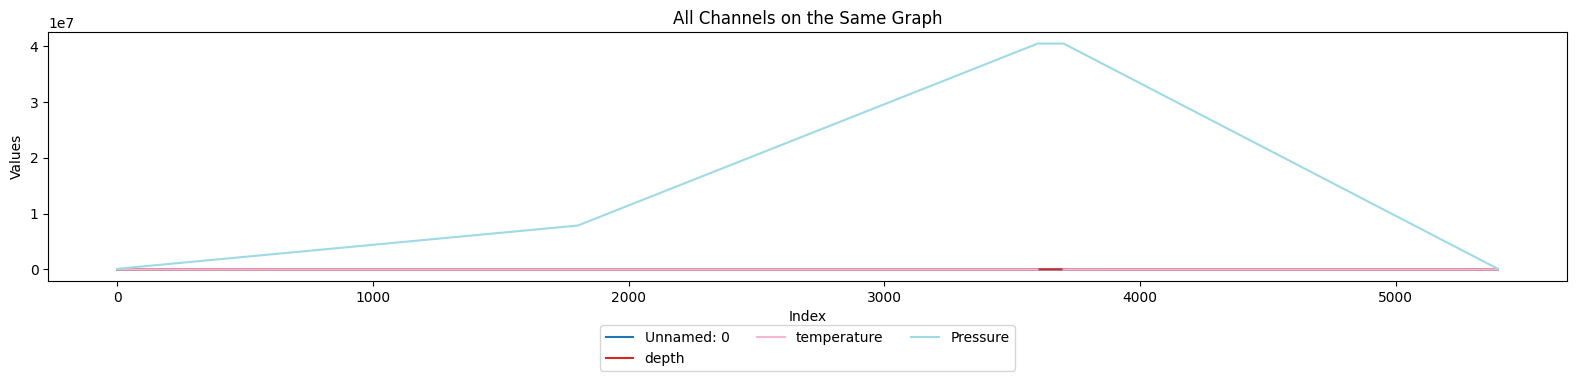

In [75]:
import matplotlib.cm as cm

# Define the number of unique colors equal to the number of columns
colors = cm.get_cmap('tab20', len(df_temp.columns))  # Using 'tab10' colormap (or any other colormap)

# Create a single plot for all columns
fig, ax1 = plt.subplots(figsize=(16, 4))

# Loop through each column and plot on the same graph
for idx, column in enumerate(df_temp.columns):
    ax1.plot(df_temp.index, df_temp[column], color=colors(idx), label=column)

# Set labels for the x and y axes
ax1.set_xlabel('Index')
ax1.set_ylabel('Values')

# Add a combined legend for all columns and place it below the plot
ax1.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=len(normalized_df.columns))

# Set a title for the plot
plt.title('All Channels on the Same Graph')

# Adjust layout to make room for the legend
plt.tight_layout()

# Save the figure
#plt.savefig("../img/dive.png")

# Display the plot
plt.show()

In [76]:
new_df_salinity.head()

,Unnamed: 0,depth,salinity
0,0.0,1.0,0.837472
1,0.0,1.0,0.837472
2,0.0,1.0,0.837472
3,0.0,1.0,0.837472
4,0.0,1.0,0.837472


In [77]:
df_buoy.head()

,Timestamp,WDIR,WSPD,GST,WVHT,APD,ATMP,WTMP,sun_exposure
0,2024-10-13 14:50:00.000000000,0.485608,0.144092,0.178265,0.521739,0.955689,0.782568,0.364723,55.152138
1,2024-10-13 14:51:26.678705408,0.480915,0.144092,0.178265,0.528020,0.954084,0.785201,0.364723,55.357682
2,2024-10-13 14:52:53.357410816,0.476223,0.144092,0.178265,0.534301,0.952479,0.787833,0.364723,55.563226
3,2024-10-13 14:54:20.036116224,0.471530,0.144092,0.178265,0.540582,0.950873,0.790466,0.364723,55.768769
4,2024-10-13 14:55:46.714821376,0.466837,0.144092,0.178265,0.546863,0.949268,0.793099,0.364723,55.974313


In [78]:
#dolphin sidequest
df_dolphins = df_dolphins[["Lizzy_angle","Perry_angle","BentHighNick_angle"]]
df_dolphins = df_dolphins.astype(float)
df_dolphins.fillna(0.0, inplace=True)
df_dolphins_normalized = min_max_normalize_column(df_dolphins)

# Remove rows where all three specified columns are 0.0
filtered_df_dolphins = df_dolphins_normalized[~((df_dolphins_normalized["Lizzy_angle"] == 0.0) & (df_dolphins_normalized["Perry_angle"] == 0.0) & (df_dolphins_normalized["BentHighNick_angle"] == 0.0))]

# Reset the index to reindex the DataFrame
filtered_df_dolphins = filtered_df_dolphins.reset_index(drop=True)

# Step 1: Create a DataFrame with 7200 rows and 3 columns, all filled with 0.0
buffered_df_dolphins = pd.DataFrame(0.0, index=range(7200), columns=filtered_df_dolphins.columns)

# Step 2: Copy the data from `filtered_df_dolphins` starting at row 2541
buffered_df_dolphins.iloc[2541:2541+len(filtered_df_dolphins)] = filtered_df_dolphins.values

# The final DataFrame `buffered_df_dolphins` will have the required structure
buffered_df_dolphins.shape

(7200, 3)

In [79]:
col1 = new_df_temp['depth']  # normalize
col2 = new_df_temp['Pressure']  # normalize
col3 = new_df_temp['temperature']  # normalize
col4 = new_df_salinity['salinity'] # normalize
col5 = new_df_U['U'] 
col6 = new_df_V['current']
col7 = new_df_W['W']

col8 = df_buoy['WVHT'] 
col9 = df_buoy['ATMP'] 
col10 = df_buoy['WSPD'] 
col11 = df_seismic[' Sample'] #note space
col12 = df_buoy['sun_exposure']*df_buoy['WSPD']

col13 = df_rain['rain']
# Select the columns from df_clouds
col14 = df_clouds[["N", "NE", "E", "SE", "S", "SW", "W", "NW"]]

col15 = buffered_df_dolphins[["Lizzy_angle","Perry_angle","BentHighNick_angle"]]

merged_df = pd.DataFrame({'depth': col1, 'pressure': col2, 'temperature': col3, 'glitter':col12})
normalized_df = merged_df.apply(lambda x: (x - x.min()) / (x.max() - x.min()))

#add ECCO Model, already normalized: 
normalized_df['salinity'] = col4
normalized_df['U_current'] = col5
normalized_df['V_current'] = col6 
normalized_df['W_current'] = col7

#add buoy, already normalized
normalized_df["buoy_height"] = col8
normalized_df["buoy_temp"] = col9 
normalized_df["buoy_windspeed"] = col10
#add Seismic, already normalized
normalized_df["seismic"] = col11
#add Rain, already normalized
normalized_df["rain"] = col13
#add Clouds, already normalized
# Assign them to normalized_df
normalized_df[["N", "NE", "E", "SE", "S", "SW", "W", "NW"]] = col14

normalized_df[["Lizzy","Perry","BentHighNick"]] = col15

normalized_df.fillna(0.0, inplace=True)

In [80]:
df_buoy.head(10)

,Timestamp,WDIR,WSPD,GST,WVHT,APD,ATMP,WTMP,sun_exposure
0,2024-10-13 14:50:00.000000000,0.485608,0.144092,0.178265,0.521739,0.955689,0.782568,0.364723,55.152138
1,2024-10-13 14:51:26.678705408,0.480915,0.144092,0.178265,0.528020,0.954084,0.785201,0.364723,55.357682
2,2024-10-13 14:52:53.357410816,0.476223,0.144092,0.178265,0.534301,0.952479,0.787833,0.364723,55.563226
3,2024-10-13 14:54:20.036116224,0.471530,0.144092,0.178265,0.540582,0.950873,0.790466,0.364723,55.768769
4,2024-10-13 14:55:46.714821376,0.466837,0.144092,0.178265,0.546863,0.949268,0.793099,0.364723,55.974313
5,2024-10-13 14:57:13.393526784,0.462144,0.144092,0.178265,0.553144,0.947662,0.795731,0.364723,56.179856
6,2024-10-13 14:58:40.072232192,0.457452,0.144092,0.178265,0.559426,0.946057,0.798364,0.364723,56.385400
7,2024-10-13 15:00:06.750937600,0.453855,0.144092,0.177597,0.565707,0.944452,0.800586,0.364723,56.589530
8,2024-10-13 15:01:33.429643008,0.463241,0.144092,0.169012,0.571988,0.942846,0.797954,0.364723,56.776925
9,2024-10-13 15:03:00.108348416,0.472626,0.144092,0.160428,0.578269,0.941241,0.795321,0.364723,56.964320


/var/folders/ww/rg8zlhq16mqg0kz1wk66r9b00000gn/T/ipykernel_1205/2866259268.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = cm.get_cmap('tab20', len(normalized_df.columns))  # Using 'tab10' colormap (or any other colormap)


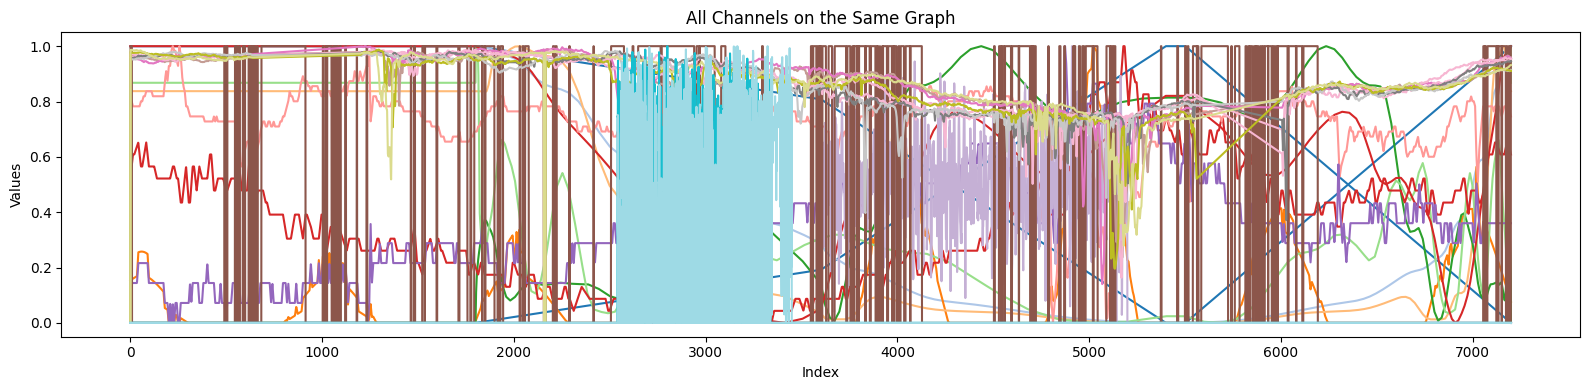

In [81]:
import matplotlib.cm as cm

# Define the number of unique colors equal to the number of columns
colors = cm.get_cmap('tab20', len(normalized_df.columns))  # Using 'tab10' colormap (or any other colormap)

# Create a single plot for all columns
fig, ax1 = plt.subplots(figsize=(16, 4))

# Loop through each column and plot on the same graph
for idx, column in enumerate(normalized_df.columns):
    ax1.plot(normalized_df.index, normalized_df[column], color=colors(idx), label=column)

# Set labels for the x and y axes
ax1.set_xlabel('Index')
ax1.set_ylabel('Values')

# Set a title for the plot
plt.title('All Channels on the Same Graph')

# Adjust layout to make room for the legend
plt.tight_layout()

# Save the figure
plt.savefig("../img/dive.png")

# Display the plot
plt.show()


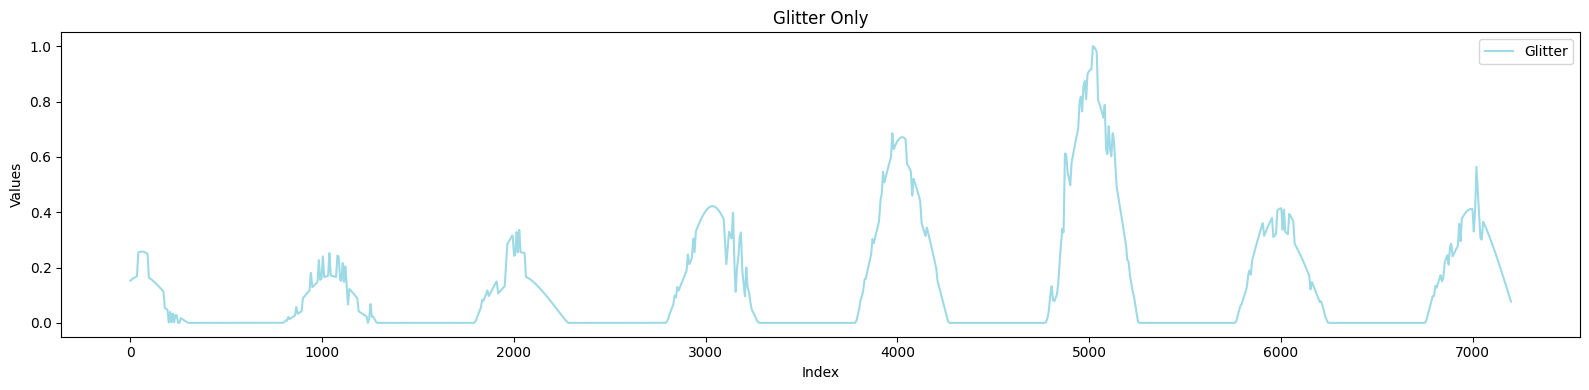

In [82]:
plt.figure(figsize=(16, 4))

# Plot the 'glitter' column from normalized_df
plt.plot(normalized_df.index, normalized_df["glitter"], color=colors(idx), label="Glitter")

# Set labels for the x and y axes
plt.xlabel('Index')
plt.ylabel('Values')

# Set a title for the plot
plt.title('Glitter Only')

# Add a legend to the plot
plt.legend()

# Adjust layout to make room for the legend
plt.tight_layout()

# Save the figure (uncomment the line below to save the image)
# plt.savefig("../img/dive.png")

# Display the plot
plt.show()

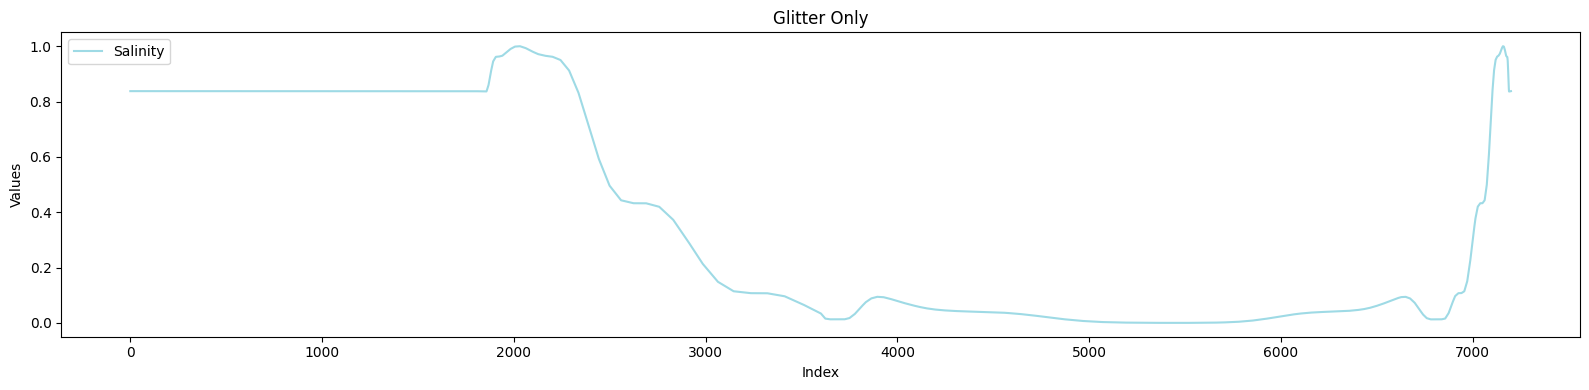

In [83]:
plt.figure(figsize=(16, 4))

# Plot the 'glitter' column from normalized_df
plt.plot(normalized_df.index, normalized_df["salinity"], color=colors(idx), label="Salinity")

# Set labels for the x and y axes
plt.xlabel('Index')
plt.ylabel('Values')

# Set a title for the plot
plt.title('Glitter Only')

# Add a legend to the plot
plt.legend()

# Adjust layout to make room for the legend
plt.tight_layout()

# Save the figure (uncomment the line below to save the image)
# plt.savefig("../img/dive.png")

# Display the plot
plt.show()

In [84]:
normalized_df.head(10)

,depth,pressure,temperature,glitter,salinity,U_current,V_current,W_current,buoy_height,buoy_temp,...,NE,E,SE,S,SW,W,NW,Lizzy,Perry,BentHighNick
0,1.0,0.0,0.999427,0.152478,0.837472,0.0,0.867684,1.0,0.521739,0.782568,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
1,1.0,0.0,0.999427,0.153047,0.837472,0.0,0.867684,1.0,0.528020,0.785201,...,0.953704,0.971672,0.957727,0.952822,0.952547,0.979167,0.986718,0.0,0.0,0.0
2,1.0,0.0,0.999427,0.153615,0.837472,0.0,0.867684,1.0,0.534301,0.787833,...,0.953704,0.971117,0.958282,0.953099,0.952547,0.979167,0.986163,0.0,0.0,0.0
3,1.0,0.0,0.999427,0.154183,0.837472,0.0,0.867684,1.0,0.540582,0.790466,...,0.953704,0.970562,0.958837,0.953377,0.952547,0.979167,0.985608,0.0,0.0,0.0
4,1.0,0.0,0.999427,0.154751,0.837472,0.0,0.867684,1.0,0.546863,0.793099,...,0.953704,0.970007,0.959392,0.953655,0.952547,0.979167,0.985053,0.0,0.0,0.0
5,1.0,0.0,0.999427,0.155320,0.837472,0.0,0.867684,1.0,0.553144,0.795731,...,0.953476,0.970364,0.959491,0.953704,0.952547,0.978710,0.985410,0.0,0.0,0.0
6,1.0,0.0,0.999427,0.155888,0.837472,0.0,0.867684,1.0,0.559426,0.798364,...,0.953198,0.970920,0.959491,0.953704,0.952547,0.978154,0.985966,0.0,0.0,0.0
7,1.0,0.0,0.999427,0.156452,0.837472,0.0,0.867684,1.0,0.565707,0.800586,...,0.952920,0.971476,0.959491,0.953704,0.952547,0.977598,0.986523,0.0,0.0,0.0
8,1.0,0.0,0.999427,0.156970,0.837472,0.0,0.867684,1.0,0.571988,0.797954,...,0.952642,0.972032,0.959491,0.953704,0.952547,0.977042,0.987079,0.0,0.0,0.0
9,1.0,0.0,0.999427,0.157489,0.837472,0.0,0.867684,1.0,0.578269,0.795321,...,0.953094,0.972040,0.959856,0.954434,0.952547,0.976670,0.986904,0.0,0.0,0.0


In [85]:
normalized_df.to_csv("./data/12min_pass_v08.csv", index=True)